# Véletlen vonalak

![generative_6](figures/generative_6.png)

<b>Forrás: </b>{cite}`tarbell`

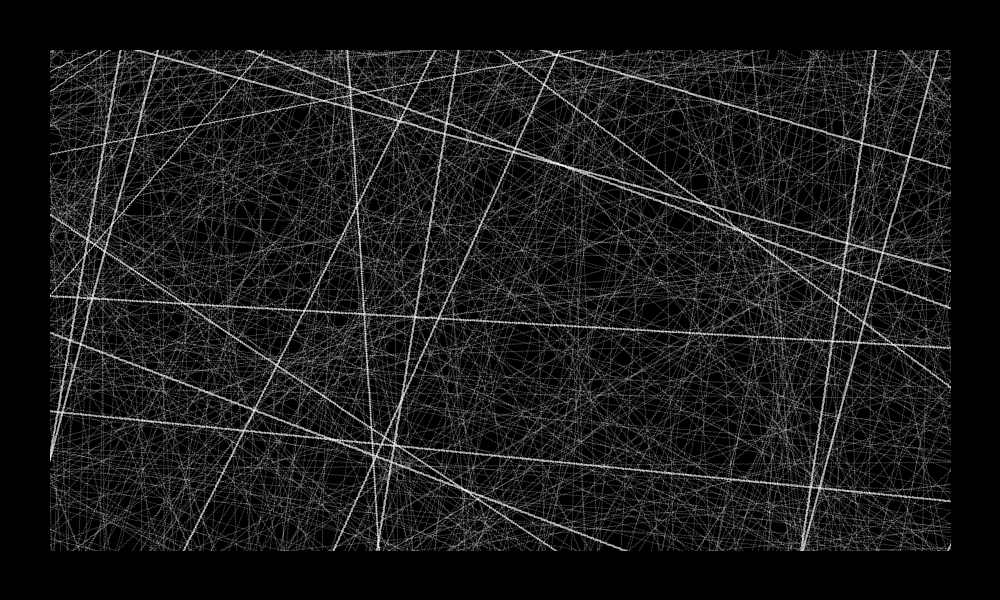

In [1]:
from PIL import Image, ImageDraw
import random

#paraméterek
image_width = 2000
image_height = 2000
frame = 50

#kép létrehozása
image = Image.new("RGB", (image_width, image_height), "black")
draw = ImageDraw.Draw(image)

def drawFrame(f, image):
    draw =ImageDraw.Draw(image)
    draw.rectangle([0,0,image.width,image.height], outline="black", width=f)    

def lineCoords(side_1, side_2):
    line = sorted([side_1,side_2])
    if line == [0,1]:
        x1 = 0
        y1 = random.randint(0,image_height)
        x2 = random.randint(0,image_width)
        y2 = image_height        
    elif line == [0,2]:
        x1 = 0
        y1 = random.randint(0,image_height)
        x2 = image_width
        y2 = random.randint(0,image_height)
    elif line == [0,3]:
        x1 = 0
        y1 = random.randint(0,image_height)
        x2 = random.randint(0,image_width)
        y2 = 0
    elif line == [1,2]:
        x1 = random.randint(0,image_width)
        y1 = image_height
        x2 = image_width
        y2 = random.randint(0,image_height)
    elif line == [1,3]:
        x1 = random.randint(0,image_width)
        y1 = image_height
        x2 = random.randint(0,image_width)
        y2 = 0
    elif line == [2,3]:
        x1 = image_width
        y1 = random.randint(0,image_height)
        x2 = random.randint(0,image_width)
        y2 = 0
    return x1,y1,x2,y2

def lineWidthAlpha(w1,a1,w2,a2):
    x = random.random()
    if x > 0.95:
        return w1,a1    
    else:
        return w2,a2 

def lineReflect_vertical(line, side_1, side_2):
    x1,y1,x2,y2 = line
    if sorted([side_1,side_2]) == [0,1]:
        new_x1 = image_width
        new_y1 = y1
        new_x2 = image_width-x2
        new_y2 = image_height
    elif sorted([side_1,side_2]) == [0,2]:
        new_x1 = image_width
        new_y1 = y1
        new_x2 = 0
        new_y2 = y2
    elif sorted([side_1,side_2]) == [0,3]:
        new_x1 = image_width
        new_y1 = y1
        new_x2 = image_width-x2
        new_y2 = 0      
    elif sorted([side_1,side_2]) == [1,2]:
        new_x1 = image_width-x1
        new_y1 = image_height
        new_x2 = 0
        new_y2 = y2
    elif sorted([side_1,side_2]) == [1,3]:
        new_x1 = image_width-x1
        new_y1 = image_height
        new_x2 = image_width-x2
        new_y2 = 0
    elif sorted([side_1,side_2]) == [2,3]:
        new_x1 = 0
        new_y1 = y1
        new_x2 = image_width-x2
        new_y2 = 0
    return new_x1, new_y1, new_x2, new_y2

for i in range(800):    
    side_from = random.randint(0,3)   
    side_to = random.randint(0,3)

    while side_from == side_to:
        side_from = random.randint(0,3)   
        side_to = random.randint(0,3)
          
    overlay = ImageDraw.Draw(image,'RGBA')
    original_line = lineCoords(side_from, side_to)    
    
    width,alpha = lineWidthAlpha(2,150,1,50)
    overlay.line(original_line,fill=(255,255,255,alpha),width=width)
    reflection = lineReflect_vertical(original_line, side_from, side_to)    
    overlay.line(reflection,fill=(255,255,255,alpha),width=width)

rotated_image = image.rotate(30,Image.BICUBIC,expand=1)

cropped_image = rotated_image.crop((800,600,1800,1200))
drawFrame(frame,cropped_image)

display(cropped_image)